In [32]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [33]:
df = pd.read_csv("movies.csv")

In [34]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [36]:
df.describe()

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


In [37]:
df["VOTES"] = pd.to_numeric(df["VOTES"].str.replace(",", ""))

<Axes: >

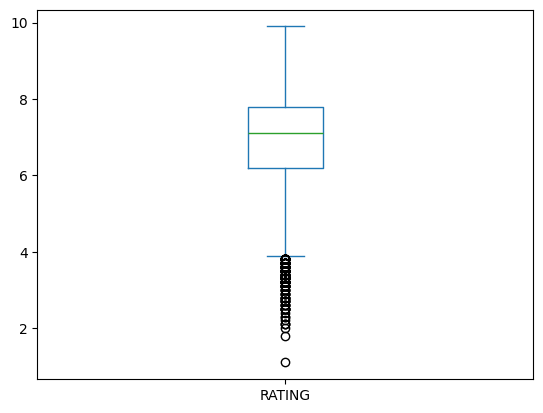

In [38]:
# Cajas y bigotes (box and whiskers, boxplot)
df["RATING"].plot.box()

<Axes: ylabel='Frequency'>

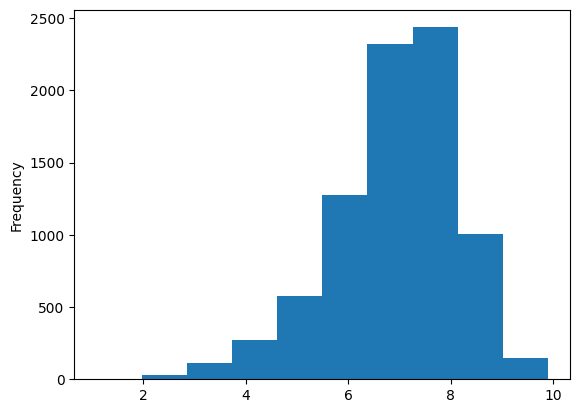

In [39]:
# Histograma
df["RATING"].plot.hist()

<Axes: ylabel='Density'>

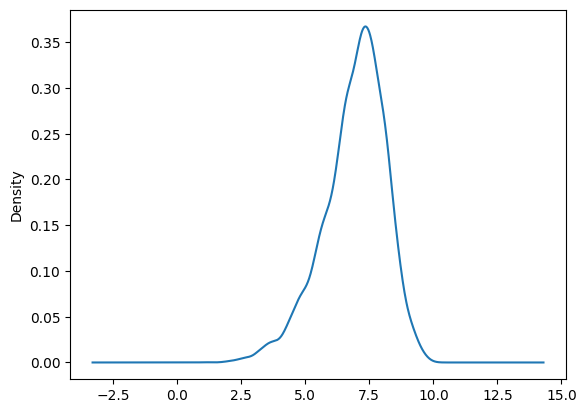

In [40]:
# Kernel distribution estimate
df["RATING"].plot.kde()

<Axes: >

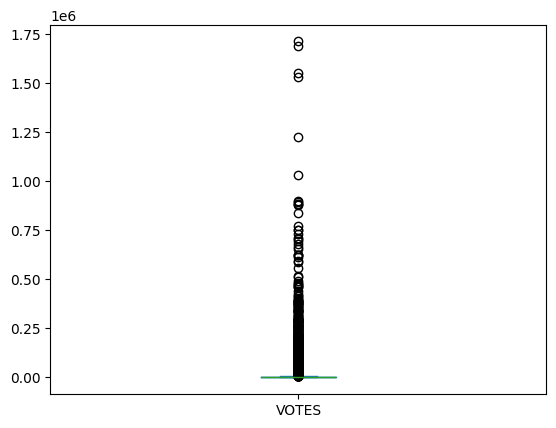

In [41]:
df["VOTES"].plot.box()

<Axes: ylabel='Frequency'>

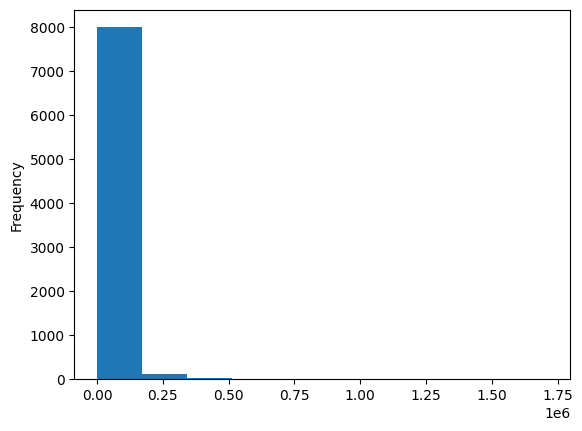

In [42]:
df["VOTES"].plot.hist()

<Axes: ylabel='Density'>

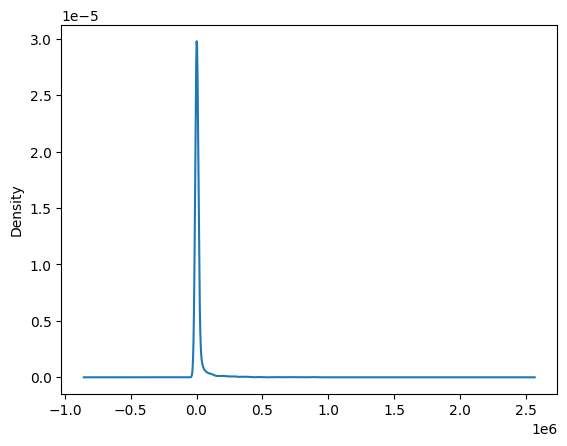

In [43]:
df["VOTES"].plot.kde()

<Axes: >

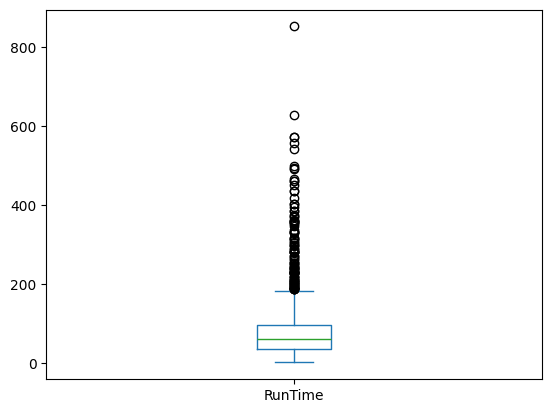

In [44]:
df["RunTime"].plot.box()

<Axes: ylabel='Frequency'>

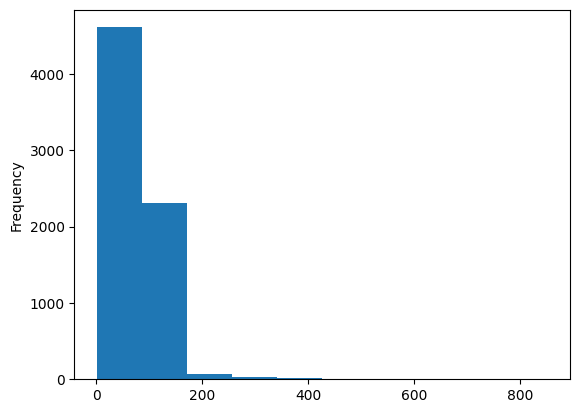

In [45]:
df["RunTime"].plot.hist()

<Axes: ylabel='Density'>

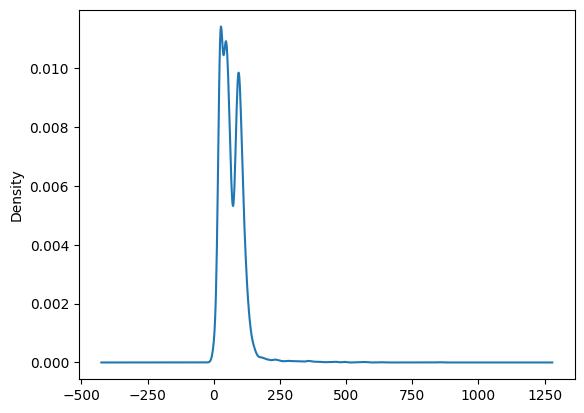

In [46]:
df["RunTime"].plot.kde()

In [47]:
# Eliminamos Gross ya que casi todos sus datos son nulos
df = df.drop(columns=["Gross"])

In [48]:
# Estandarizamos y quitamos los espacios incluyendo \n
# Pasamos todas las columnas tipo object a minúsculas
columnas = ["MOVIES", "GENRE", "STARS", "ONE-LINE"]
for col in columnas:
  df[col] = df[col].str.strip().str.replace("\n", " ").str.lower()

In [49]:
# Para renombrar columnas
df = df.rename(columns={"RunTime": "RUNTIME"})

In [50]:
# Muestra todas las filas que se repiten consideranto todos sus valores
df[df.duplicated()]
# Muestra todas las filas donde el valor de las columnas de subset se repiten
# df[df.duplicated(subset=["MOVIES"])]

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RUNTIME
6833,mighty little bheem,(2019– ),"animation, short, adventure",NaN,add a plot,"directors: rajiv chilaka, krishna mohan chint...",NaN,NaN
6835,mighty little bheem,(2019– ),"animation, short, adventure",9.0,add a plot,"directors: rajiv chilaka, krishna mohan chint...",6.0,NaN
6836,mighty little bheem,(2019– ),"animation, short, adventure",9.0,add a plot,"directors: rajiv chilaka, krishna mohan chint...",6.0,NaN
6837,mighty little bheem,(2019– ),"animation, short, adventure",NaN,add a plot,"directors: rajiv chilaka, krishna mohan chint...",NaN,NaN
6838,mighty little bheem,(2019– ),"animation, short, adventure",NaN,add a plot,"directors: rajiv chilaka, krishna mohan chint...",NaN,NaN
...,...,...,...,...,...,...,...,...
9989,1899,(2022– ),"drama, history, horror",NaN,add a plot,director: baran bo odar,NaN,NaN
9990,1899,(2022– ),"drama, history, horror",NaN,add a plot,director: baran bo odar,NaN,NaN
9991,1899,(2022– ),"drama, history, horror",NaN,add a plot,director: baran bo odar,NaN,NaN
9992,1899,(2022– ),"drama, history, horror",NaN,add a plot,director: baran bo odar,NaN,NaN


In [51]:
# Para eliminar columnas
df = df.drop_duplicates() # Coinciden todos los valores
#df.drop_duplicates(subset=["MOVIES"]) # Valores de movies que se repiten

In [52]:
df.isna().sum()

MOVIES         0
YEAR         542
GENRE         78
RATING      1400
ONE-LINE       0
STARS          0
VOTES       1400
RUNTIME     2560
dtype: int64

In [53]:
# Eliminamos filas que no tienen año asignado
df = df.dropna(subset=["YEAR"])

In [54]:
def movie_or_series(x):
  if "–" in str(x):
    return "series"
  return "movie"

In [55]:
# Creamos una columna de tipo (Película o serie)
df["TYPE"] = df["YEAR"].apply(movie_or_series)

In [56]:
df.head() # Verificamos

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RUNTIME,TYPE
0,blood red sky,(2021),"action, horror, thriller",6.1,a woman with a mysterious illness is forced in...,director: peter thorwarth | stars: peri b...,21062.0,121.0,movie
1,masters of the universe: revelation,(2021– ),"animation, action, adventure",5.0,the war for eternia begins again in what may b...,"stars: chris wood, sarah michelle gellar, le...",17870.0,25.0,series
2,the walking dead,(2010–2022),"drama, horror, thriller",8.2,sheriff deputy rick grimes wakes up from a com...,"stars: andrew lincoln, norman reedus, meliss...",885805.0,44.0,series
3,rick and morty,(2013– ),"animation, adventure, comedy",9.2,an animated series that follows the exploits o...,"stars: justin roiland, chris parnell, spence...",414849.0,23.0,series
4,army of thieves,(2021),"action, crime, horror",NaN,"a prequel, set before the events of army of th...",director: matthias schweighöfer | stars: ...,NaN,NaN,movie


<Axes: >

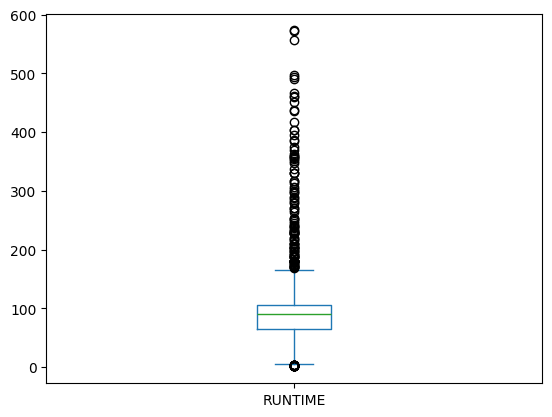

In [57]:
df[df["TYPE"] == "movie"]["RUNTIME"].plot.box()

<Axes: >

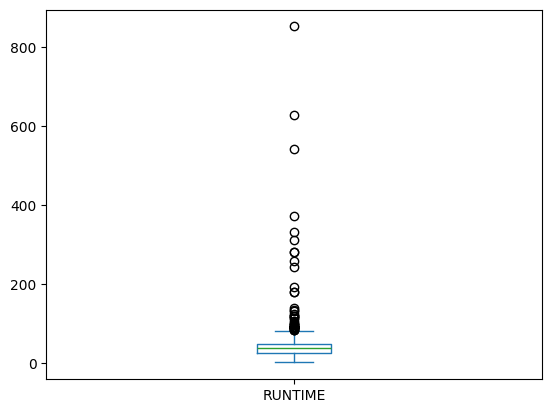

In [58]:
df[df["TYPE"] == "series"]["RUNTIME"].plot.box()

In [59]:
# Imputar datos
# object -> moda
# númericos:
#  -> media -> distribución normal y que no haya muchos valores atípicos
#  -> mediana -> distribución no es normal, si es normal pero cargada a
#     alguno de los extremos, hay muchos valores atípicos o
#     o los valores atípicos están muy alejados del centro
df = df.fillna({
    "GENRE": df["GENRE"].mode()[0], # No siempre es correcto rellenar con moda
    "VOTES": df["VOTES"].median(),
    "RATING": df["RATING"].mean(),
    "RUNTIME": df["RUNTIME"].median()
})

In [60]:
df.isna().sum()

MOVIES      0
YEAR        0
GENRE       0
RATING      0
ONE-LINE    0
STARS       0
VOTES       0
RUNTIME     0
TYPE        0
dtype: int64

In [61]:
# Guardamos un nuevo archivo con los cambios hechos
df.to_csv("movies_clean.csv", index=False)

In [68]:
inertia = []
k_values = range(1, 11) 

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df.drop(columns=["RATING"]))
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)
plt.show()

ValueError: could not convert string to float: 'blood red sky'

In [65]:
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(df.drop(columns=["VOTES"]))
df["Cluster"] = kmeans.labels_

ValueError: could not convert string to float: 'blood red sky'

In [ ]:
# Reducimos la domensionalidad de los datos a 2 para poder visualizarlos
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(columns=["ustomerIDC", "Cluster"]))

# Creamos un DataFrame con los datos reducidos y el cluster asignado 
df_pca = pd.DataFrame(df_pca, columns=["PCA1", "PCA2"])
df_pca["Cluster"] = df["Cluster"]

# Visualizamos los clusters
plt.figure(figsize=(10, 8))
for cluster in range(k):
    cluster_data = df_pca[df_pca["Cluster"] == cluster]
    plt.scatter(cluster_data["PCA1"], cluster_data["PCA2"], label=f"Cluster {cluster}")

plt.title("KMeans Clusters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()